# Task 1

---

## *Web scraping and analysis*

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
# Creating an empty list to store the reviews given by customers
reviews = []

# Creating an empty list to store the dates on which the customers posted the reviews
date_travelled = []

# Creating an empty list to store the countries from which the customer has travlled or the reviews posted
country = []

# Creating an empty list to store the number of Ratings given by customers
num_of_Ratings = []

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100


# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html5')

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    for j in parsed_content.find_all('time'):
        date_travelled.append(j.text)

    for k in parsed_content.find_all('h3'):
        country.append(k.span.next_sibling.text.strip(' ()'))

    for l in soup.find_all('div', class_ = 'rating-10'):
        try:
            num_of_Ratings.append(l.span.text)
        except:
            num_of_Ratings.append("Null")


Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10


In [ ]:
print(f"Length of the reviews : {len(reviews)}")

print(f"Length of the country : {len(country)}")

print(f"Length of the dateTravlled : {len(date_travelled)}")

print(f"Length of the numOfRatings : {len(num_of_Ratings)}")

Length of the reviews : 1000
Length of the country : 1000
Length of the dateTravlled : 1000
Length of the numOfRatings : 1010


In [ ]:
num_of_Ratings = num_of_Ratings[:1000]
print(f"Length of the numOfRatings : {len(num_of_Ratings)}")

Length of the numOfRatings : 1000


In [ ]:
df = pd.DataFrame({"Date": date_travelled, "Country" : country, "Reviews" : reviews, "Ratings" : num_of_Ratings,})

In [ ]:
df.head()

,Date,Country,Reviews,Ratings
0,26th March 2024,United Kingdom,✅ Trip Verified | A last minute business trip ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5
1,26th March 2024,United Kingdom,✅ Trip Verified | Overall I would say disapp...,8
2,25th March 2024,United Kingdom,Not Verified | LHR to Delhi in Business. Exce...,5
3,25th March 2024,United Kingdom,Not Verified | Efficient and Smooth flight fr...,10
4,25th March 2024,United Kingdom,✅ Trip Verified | Was told we can not take han...,9


In [ ]:
print(f"Shape of the dataset : {df.shape}")

Shape of the dataset : (1000, 4)


In [ ]:
# Storing the dataset into CSV format

df.to_csv("BA_reviews.csv")

## *Exploratory Data Analysis:*

In [ ]:
df.head()

,Date,Country,Reviews,Ratings
0,26th March 2024,United Kingdom,✅ Trip Verified | A last minute business trip ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5
1,26th March 2024,United Kingdom,✅ Trip Verified | Overall I would say disapp...,8
2,25th March 2024,United Kingdom,Not Verified | LHR to Delhi in Business. Exce...,5
3,25th March 2024,United Kingdom,Not Verified | Efficient and Smooth flight fr...,10
4,25th March 2024,United Kingdom,✅ Trip Verified | Was told we can not take han...,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     1000 non-null   object
 1   Country  1000 non-null   object
 2   Reviews  1000 non-null   object
 3   Ratings  1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [ ]:
df.describe()

,Date,Country,Reviews,Ratings
count,1000,1000,1000,1000
unique,708,55,1000,11
top,8th December 2019,United Kingdom,✅ Trip Verified | A last minute business trip ...,1
freq,7,572,1,358


In [ ]:
df.shape

(1000, 4)

In [ ]:
df.columns

Index(['Date', 'Country', 'Reviews', 'Ratings'], dtype='object')

In [ ]:
df.dtypes

Date       object
Country    object
Reviews    object
Ratings    object
dtype: object

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Date       0
Country    0
Reviews    0
Ratings    0
dtype: int64

## *Step 1: Data Cleaning*

* Data Cleaning is a form of Data Management.

* A Data Cleaning process involves inspecting all of the data in a database and updating or removing information that is incomplete, incorrect, incorrectly formatted, duplicated or irrelavnt.

In [ ]:
df.Date = pd.to_datetime(df.Date)

In [ ]:
df.Ratings.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '8', '5', '10', '9', '3', '7',
       '1', '2', '6', '4'], dtype=object)

In [ ]:
df.Ratings = df.Ratings.str.strip("'\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [ ]:
df.Ratings.value_counts()

1     358
2     108
3      95
10     90
8      78
9      76
5      58
4      58
7      42
6      37
Name: Ratings, dtype: int64

In [ ]:
df[['Trip_Status', 'Reviews']] = df.Reviews.str.split('|', expand = True)

In [ ]:
df['Trip_Status'] = df['Trip_Status'].str.strip('✅')
df['Trip_Status'] = df['Trip_Status'].str.strip('❎')
df['Trip_Status'] = df['Trip_Status'].str.strip()

In [ ]:
df['Trip_Status'].value_counts()

Trip Verified    762
Not Verified     237
cNot Verified      1
Name: Trip_Status, dtype: int64

In [ ]:
df['Trip_Status'] = df['Trip_Status'].replace('cNot Verified','Not Verified')

In [ ]:
df['Trip_Status'].value_counts()

Trip Verified    762
Not Verified     238
Name: Trip_Status, dtype: int64

In [ ]:
df.head()

,Date,Country,Reviews,Ratings,Trip_Status
0,2024-03-26,United Kingdom,"A last minute business trip to HND, a route I...",5,Trip Verified
1,2024-03-26,United Kingdom,Overall I would say disappointing. Due to B...,8,Trip Verified
2,2024-03-25,United Kingdom,LHR to Delhi in Business. Exceptional flight...,5,Not Verified
3,2024-03-25,United Kingdom,Efficient and Smooth flight from start to fi...,10,Not Verified
4,2024-03-25,United Kingdom,Was told we can not take hand luggage onto th...,9,Trip Verified


Cleaning the Reviews


In [ ]:
import re

In [ ]:
def clean_Reviews(txt):
    txt = re.sub('[^A-Za-z]+', ' ', str(txt))
    return txt

In [ ]:
df['Cleaned_Reviews'] = df['Reviews'].apply(clean_Reviews)

In [ ]:
df = df.drop(columns = ['Reviews'])
df.head()

,Date,Country,Ratings,Trip_Status,Cleaned_Reviews
0,2024-03-26,United Kingdom,5,Trip Verified,A last minute business trip to HND a route I ...
1,2024-03-26,United Kingdom,8,Trip Verified,Overall I would say disappointing Due to BA s...
2,2024-03-25,United Kingdom,5,Not Verified,LHR to Delhi in Business Exceptional flight S...
3,2024-03-25,United Kingdom,10,Not Verified,Efficient and Smooth flight from start to fin...
4,2024-03-25,United Kingdom,9,Trip Verified,Was told we can not take hand luggage onto th...


## *Step 2: Tokenization, Stopwords removal, and POS-tagging*

* Tokenization is a crucial step in Natural Language Processing (NLP) and machine learning. It involves breaking down a sequence of text into smaller units, called tokens, to facilitate analysis by machines. In essence, tokenization converts text into individual words or smaller parts, enabling machines to better understand human language.

* Stopwords are common words found in a language, such as "a", "the", "is", "are", etc. In Natural Language Processing (NLP), stopwords are often removed from text data as they carry little meaningful information.

* Part-of-speech (POS) tagging is vital in natural language processing (NLP), involving labeling words in a sentence with their respective POS tags (word, tag). These tags denote the grammatical category of a word, like noun, verb, adjective, adverb, etc. POS tagging aids in understanding a sentence's syntactic structure and discerning each word's role, preserving context crucial for Lemmatization.

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# POS tagging dictionary.
pos_dict = {"J":wordnet.ADJ, "V":wordnet.VERB, "N":wordnet.NOUN, "R":wordnet.ADV}

In [ ]:
def stopwords_token(txt):

    pos_Tags = pos_tag(word_tokenize(txt))

    pos_TagList = []
    for p_word, p_Tag in pos_Tags:
        if p_word.lower() not in set(stopwords.words('english')):
            pos_TagList.append(tuple([p_word, pos_dict.get(p_Tag[0])]))

    return pos_TagList

In [ ]:
df["Pos_Tags"] = df["Cleaned_Reviews"].apply(stopwords_token)

In [ ]:
df.head()

,Date,Country,Ratings,Trip_Status,Cleaned_Reviews,Pos_Tags
0,2024-03-26,United Kingdom,5,Trip Verified,A last minute business trip to HND a route I ...,"[(last, a), (minute, n), (business, n), (trip,..."
1,2024-03-26,United Kingdom,8,Trip Verified,Overall I would say disappointing Due to BA s...,"[(Overall, a), (would, None), (say, v), (disap..."
2,2024-03-25,United Kingdom,5,Not Verified,LHR to Delhi in Business Exceptional flight S...,"[(LHR, n), (Delhi, n), (Business, n), (Excepti..."
3,2024-03-25,United Kingdom,10,Not Verified,Efficient and Smooth flight from start to fin...,"[(Efficient, n), (Smooth, n), (flight, n), (st..."
4,2024-03-25,United Kingdom,9,Trip Verified,Was told we can not take hand luggage onto th...,"[(told, v), (take, v), (hand, n), (luggage, n)..."


## *Step 3: Lemmatization*

Lemmatization groups together different inflected forms of a word to analyze them as a single item, known as a stem, which retains the word's lexical meaning. Unlike stemming, which often produces meaningless root words by simply chopping off characters, lemmatization yields meaningful root words. It's important to note that lemmatization requires POS tagging, a step we've already completed.

In [ ]:
# Obtaining stem-words with Lemmatization.
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatization(p_tag_data):
    lemmatize_tags = " "
    for word, pos in p_tag_data:
     if not pos:
        lemma = word
        lemmatize_tags = lemmatize_tags + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemmatize_tags = lemmatize_tags + " " + lemma
    return lemmatize_tags

In [ ]:
df['Lemmatization'] = df['Pos_Tags'].apply(lemmatization)

In [ ]:
df.head()

,Date,Country,Ratings,Trip_Status,Cleaned_Reviews,Pos_Tags,Lemmatization
0,2024-03-26,United Kingdom,5,Trip Verified,A last minute business trip to HND a route I ...,"[(last, a), (minute, n), (business, n), (trip,...",last minute business trip HND route regularl...
1,2024-03-26,United Kingdom,8,Trip Verified,Overall I would say disappointing Due to BA s...,"[(Overall, a), (would, None), (say, v), (disap...",Overall would say disappointing Due BA statu...
2,2024-03-25,United Kingdom,5,Not Verified,LHR to Delhi in Business Exceptional flight S...,"[(LHR, n), (Delhi, n), (Business, n), (Excepti...",LHR Delhi Business Exceptional flight Stylis...
3,2024-03-25,United Kingdom,10,Not Verified,Efficient and Smooth flight from start to fin...,"[(Efficient, n), (Smooth, n), (flight, n), (st...",Efficient Smooth flight start finish Cabin c...
4,2024-03-25,United Kingdom,9,Trip Verified,Was told we can not take hand luggage onto th...,"[(told, v), (take, v), (hand, n), (luggage, n)...",tell take hand luggage onto plane overhead c...


## *Step 4: Sentiment Analysis (VADER)*

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a rule-based sentiment analyzer designed for social media text. It calculates scores for positive, negative, neutral, and compound sentiments using the SentimentIntensityAnalyzer() object. The compound score, ranging from -1 to +1, combines the scores of positive, negative, and neutral sentiments. A compound score of >=0.5 is considered positive, while <0 indicates negativity.

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.4 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
sentiment_Analyzer = SentimentIntensityAnalyzer()

In [ ]:
def vader_SentimentAnalysis(review):
    v_SA = sentiment_Analyzer.polarity_scores(review)

    return v_SA['compound']

In [ ]:
df['Sentiment_Score'] = df['Lemmatization'].apply(vader_SentimentAnalysis)

In [ ]:
df.head()

,Date,Country,Ratings,Trip_Status,Cleaned_Reviews,Pos_Tags,Lemmatization,Sentiment_Score
0,2024-03-26,United Kingdom,5,Trip Verified,A last minute business trip to HND a route I ...,"[(last, a), (minute, n), (business, n), (trip,...",last minute business trip HND route regularl...,0.9794
1,2024-03-26,United Kingdom,8,Trip Verified,Overall I would say disappointing Due to BA s...,"[(Overall, a), (would, None), (say, v), (disap...",Overall would say disappointing Due BA statu...,-0.7281
2,2024-03-25,United Kingdom,5,Not Verified,LHR to Delhi in Business Exceptional flight S...,"[(LHR, n), (Delhi, n), (Business, n), (Excepti...",LHR Delhi Business Exceptional flight Stylis...,0.9788
3,2024-03-25,United Kingdom,10,Not Verified,Efficient and Smooth flight from start to fin...,"[(Efficient, n), (Smooth, n), (flight, n), (st...",Efficient Smooth flight start finish Cabin c...,0.9414
4,2024-03-25,United Kingdom,9,Trip Verified,Was told we can not take hand luggage onto th...,"[(told, v), (take, v), (hand, n), (luggage, n)...",tell take hand luggage onto plane overhead c...,-0.7845


In [ ]:
def sentimentAnalysis_vader(compound):
    if compound >= 0.5:
        return 'Positive'

    elif compound < 0:
        return 'Negative'

    else:
        return 'Neutral'

In [ ]:
df['Sentiment_Analysis'] = df['Sentiment_Score'].apply(sentimentAnalysis_vader)

In [ ]:
df.head()

,Date,Country,Ratings,Trip_Status,Cleaned_Reviews,Pos_Tags,Lemmatization,Sentiment_Score,Sentiment_Analysis
0,2024-03-26,United Kingdom,5,Trip Verified,A last minute business trip to HND a route I ...,"[(last, a), (minute, n), (business, n), (trip,...",last minute business trip HND route regularl...,0.9794,Positive
1,2024-03-26,United Kingdom,8,Trip Verified,Overall I would say disappointing Due to BA s...,"[(Overall, a), (would, None), (say, v), (disap...",Overall would say disappointing Due BA statu...,-0.7281,Negative
2,2024-03-25,United Kingdom,5,Not Verified,LHR to Delhi in Business Exceptional flight S...,"[(LHR, n), (Delhi, n), (Business, n), (Excepti...",LHR Delhi Business Exceptional flight Stylis...,0.9788,Positive
3,2024-03-25,United Kingdom,10,Not Verified,Efficient and Smooth flight from start to fin...,"[(Efficient, n), (Smooth, n), (flight, n), (st...",Efficient Smooth flight start finish Cabin c...,0.9414,Positive
4,2024-03-25,United Kingdom,9,Trip Verified,Was told we can not take hand luggage onto th...,"[(told, v), (take, v), (hand, n), (luggage, n)...",tell take hand luggage onto plane overhead c...,-0.7845,Negative


* Count of Vader Sentiment Analysis

In [ ]:
vader_SA_Count = df['Sentiment_Analysis'].value_counts()
vader_SA_Count

Positive    478
Negative    414
Neutral     108
Name: Sentiment_Analysis, dtype: int64

In [ ]:
df.to_csv("BA_reviews_analysed.csv")

## *Data Vizualization:*

* **Pie-Chart**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

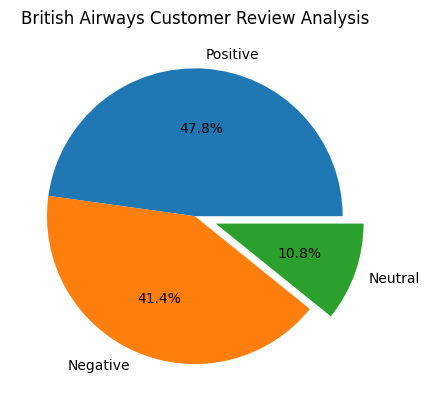

In [ ]:
# Declaring data.
data = vader_SA_Count.values

# Define Seaborn color palette to use.
palette_color = sns.color_palette()

# Plotting data on chart.
plt.title("British Airways Customer Review Analysis")
plt.pie(data, labels=vader_SA_Count.index, colors=palette_color, explode = (0, 0, 0.15), autopct="%.1f%%")

# Displaying chart.
plt.show()

* **Word Cloud**

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

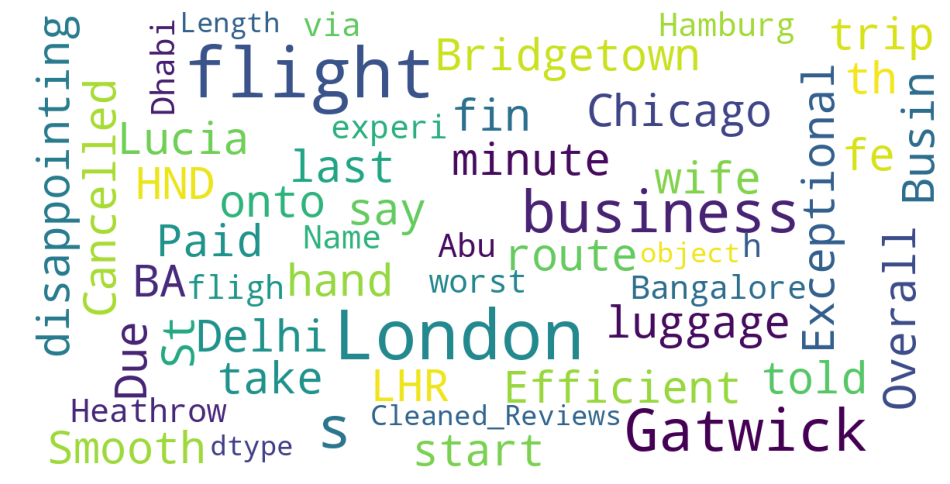

In [ ]:
def show_wordcloud_Reviews(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud_Reviews(df.Cleaned_Reviews)

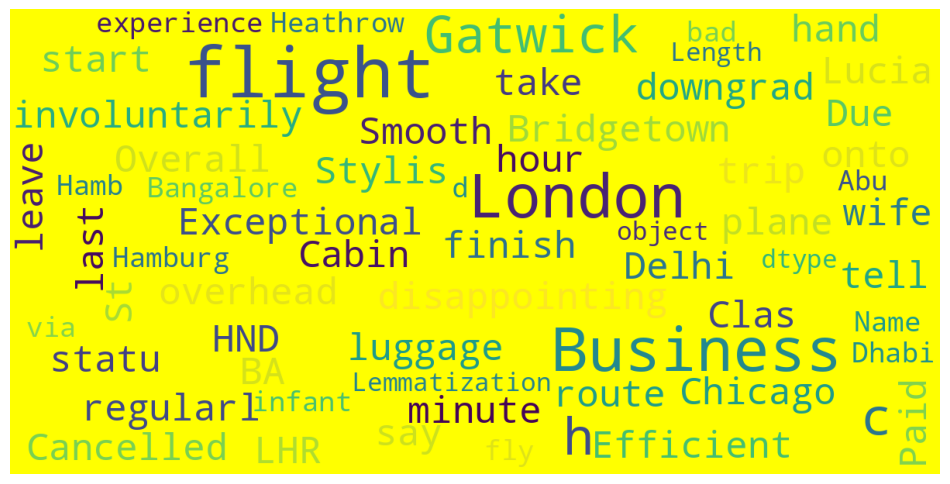

In [ ]:
def show_wordcloud_Lemmatization(data):
    wordcloud = WordCloud(
        background_color='Yellow',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud_Lemmatization(df.Lemmatization)

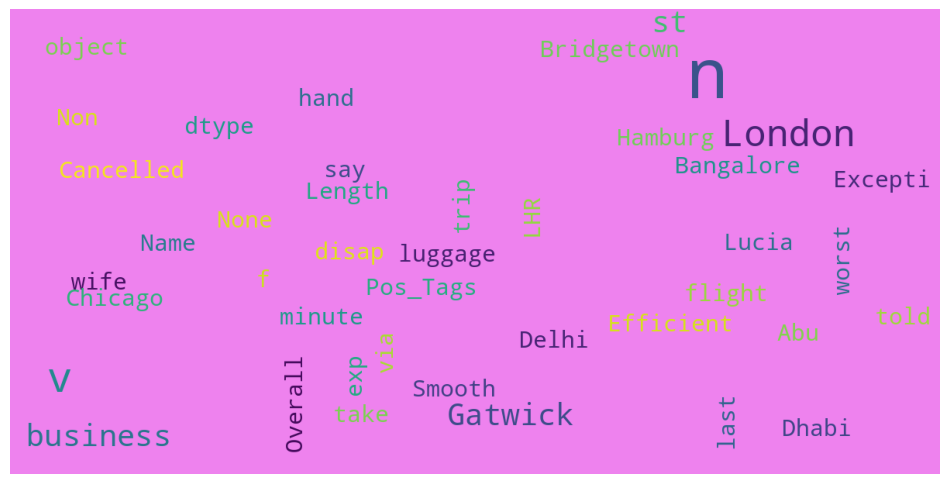

In [ ]:
def show_wordcloud_Pos_Tags(data):
    wordcloud = WordCloud(
        background_color='Violet',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud_Pos_Tags(df.Pos_Tags)